In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import copy
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# load modules related to this exercise
from DurableConsumptionModel import DurableConsumptionModelClass 
import estimate
import estimate_old

import numba as nb
nb.set_num_threads(8)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [55]:
model = DurableConsumptionModelClass(name='example_negm',par={'solmethod':'negm','do_print':False})
model.precompile_numba() # solve with very coarse grids
model.solve()
model.simulate()

par = model.par
sol = model.sol
sim = model.sim

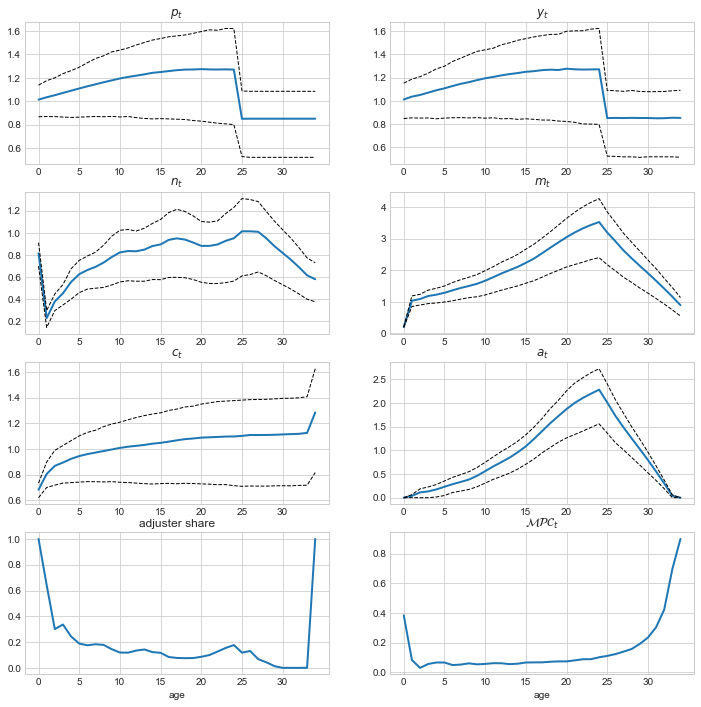

In [56]:
model.lifecycle(deciles=False)

## MOMENTS USING MEAN FOR a

In [57]:
data = copy.copy(sim)
par_beta = copy.copy(par.beta)
par_rho = copy.copy(par.rho)
data.moments = estimate_old.calc_moments(par,data)

In [19]:
Nbeta = 5
Nrho = 5

obj = np.nan + np.zeros((Nbeta,Nrho))
beta = np.linspace(0.955,0.975,Nbeta)
rho = np.linspace(1.5,2.5,Nrho)

count = 1
for i in range(Nbeta):
    for j in range(Nrho):
        print(f"{count} / {Nbeta*Nrho}")
        est_par = ['beta','rho']
        theta0 = [beta[i], rho[j]]
        obj[i,j]=estimate_old.sum_squared_diff_moments(theta0,model,est_par,data)
        count += 1


1 / 25
2 / 25
3 / 25
4 / 25
5 / 25
6 / 25
7 / 25
8 / 25
9 / 25
10 / 25
11 / 25
12 / 25
13 / 25
14 / 25
15 / 25
16 / 25
17 / 25
18 / 25
19 / 25
20 / 25
21 / 25
22 / 25
23 / 25
24 / 25
25 / 25


/var/folders/d8/k9yj32vx0_76gfhvj06fhzzw0000gn/T/ipykernel_83489/2295316607.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink=0.5, aspect=5)


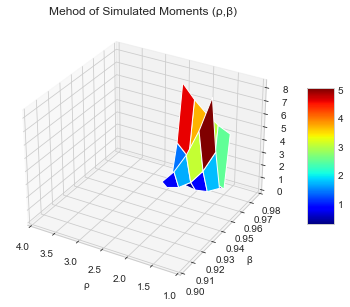

In [20]:
#Plot figure in three dimensions

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Make data.
X, Y = np.meshgrid(rho, beta)

# Plot the surface.
surf = ax.plot_surface(X, Y, obj, cmap=cm.jet)

# Customize the axis.
ax.set_xlabel(f'\u03C1')
ax.set_ylabel(f'\u03B2')
ax.set_title(f'Mehod of Simulated Moments (\u03C1,\u03B2)')
ax.set_xlim(1.0,4.0)
#ax.set_xlim(1.0,6.0)
ax.set_ylim(0.9,0.98)
ax.invert_xaxis()

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show();

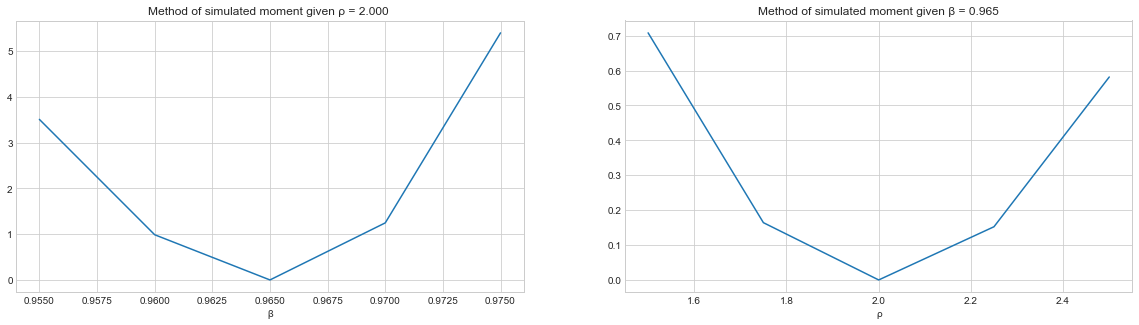

In [21]:
# Plot figure in two dimensions
i_rho = abs(par_rho - rho).argmin(0) #index of rho closest to true rho
i_beta = abs(par_beta - beta).argmin(0) #index of beta closest to true beta

fig = plt.figure(figsize=(20,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(beta,obj[:,i_rho])
ax.set_xlabel(f'\u03B2')
ax.set_title(f'Method of simulated moment given \u03C1 = {rho[i_rho]:.3f} ')

ax = fig.add_subplot(1,2,2)
ax.plot(rho,obj[i_beta,:])
ax.set_xlabel(f'\u03C1')
ax.set_title(f'Method of simulated moment given \u03B2 = {beta[i_beta]:.3f}')


plt.show()

## MOMENTS USING MEAN FOR a AND y

In [53]:
data = copy.copy(sim)
par_beta = copy.copy(par.beta)
par_rho = copy.copy(par.rho)
data.moments = estimate.calc_moments(par,data)

[0.79638759 1.12012302]


In [58]:
Nbeta = 5
Nrho = 5

obj = np.nan + np.zeros((Nbeta,Nrho))
beta = np.linspace(0.955,0.975,Nbeta)
rho = np.linspace(1.5,2.5,Nrho)

count = 1
for i in range(Nbeta):
    for j in range(Nrho):
        print(f"{count} / {Nbeta*Nrho}")
        est_par = ['beta','rho']
        theta0 = [beta[i], rho[j]]
        obj[i,j]=estimate.sum_squared_diff_moments(theta0,model,est_par,data)
        count += 1


1 / 25
Mean of moments:  [0.28573091 0.31617043 0.35026828 0.40404297 0.4662831  0.56530385
 0.68286092 0.81032129 0.92204943 1.03596151 1.15521867 1.27685566
 1.41392231 1.55071111 1.32977197 1.10230129 0.92648298 0.76075652
 0.60660868 0.4579931  0.30476116]
2 / 25
Mean of moments:  [0.33415835 0.37187081 0.41630475 0.48395407 0.56060645 0.67108764
 0.80662622 0.94816612 1.07201562 1.1925882  1.31767184 1.43235092
 1.56167759 1.69270607 1.46629377 1.22602636 1.03908528 0.8601216
 0.69173662 0.52697175 0.35501847]
3 / 25
Mean of moments:  [0.38761429 0.43496043 0.49012894 0.57078273 0.65568138 0.78329724
 0.9269811  1.07810433 1.21490963 1.34093186 1.47055148 1.57946092
 1.70153253 1.82288581 1.58725911 1.3410882  1.14072018 0.94975652
 0.76943234 0.59027838 0.40140988]
4 / 25


Traceback (most recent call last):
  File "/Users/frederikp/OneDrive - University of Copenhagen/Kandidat/Dynamic Programming/dp2022/praise_the_lord/DurableConsumptionModel.py", line 300, in solve
    post_decision.compute_wq(t,sol,par,compute_q=True)
KeyboardInterrupt


KeyboardInterrupt: 

/var/folders/d8/k9yj32vx0_76gfhvj06fhzzw0000gn/T/ipykernel_83489/2295316607.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink=0.5, aspect=5)


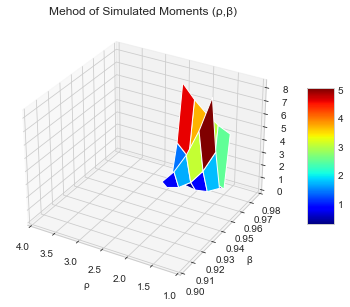

In [42]:
#Plot figure in three dimensions

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Make data.
X, Y = np.meshgrid(rho, beta)

# Plot the surface.
surf = ax.plot_surface(X, Y, obj, cmap=cm.jet)

# Customize the axis.
ax.set_xlabel(f'\u03C1')
ax.set_ylabel(f'\u03B2')
ax.set_title(f'Mehod of Simulated Moments (\u03C1,\u03B2)')
ax.set_xlim(1.0,4.0)
#ax.set_xlim(1.0,6.0)
ax.set_ylim(0.9,0.98)
ax.invert_xaxis()

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show();

In [43]:
par_rho

2.0

In [44]:
abs(par_rho - rho)

array([0.5 , 0.25, 0.  , 0.25, 0.5 ])

In [45]:
rho

array([1.5 , 1.75, 2.  , 2.25, 2.5 ])

In [46]:
i_rho

4

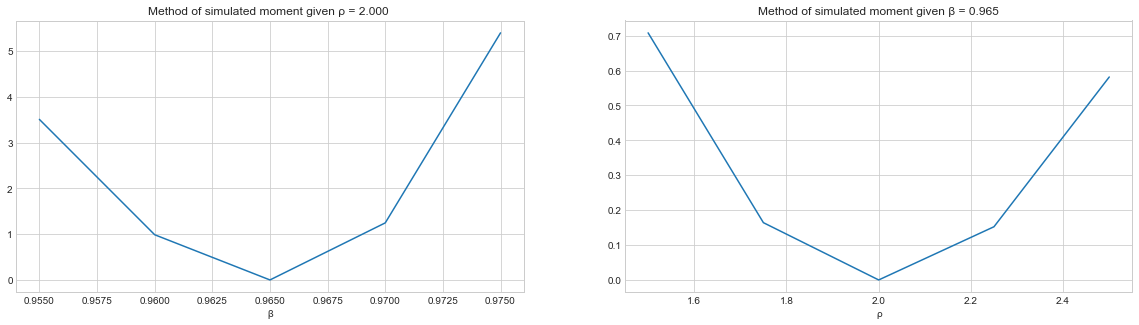

In [47]:
# Plot figure in two dimensions
i_rho = abs(par_rho - rho).argmin(0) #index of rho closest to true rho
i_beta = abs(par_beta - beta).argmin(0) #index of beta closest to true beta


fig = plt.figure(figsize=(20,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(beta,obj[:,i_rho])
ax.set_xlabel(f'\u03B2')
ax.set_title(f'Method of simulated moment given \u03C1 = {rho[i_rho]:.3f} ')

ax = fig.add_subplot(1,2,2)
ax.plot(rho,obj[i_beta,:])
ax.set_xlabel(f'\u03C1')
ax.set_title(f'Method of simulated moment given \u03B2 = {beta[i_beta]:.3f}')


plt.show()

## Rest of notebook

In [27]:
est_par = ['beta'] # Parameter to estimate
theta0 = [0.94] # Initial guess

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)

print(f'Objective:               {est.fun:.4f}')
print(f'beta:                    {est.x[0]:.4f}')
print(f'Number of iterations:    {est.nit}')


Traceback (most recent call last):
  File "/Users/frederikp/OneDrive - University of Copenhagen/Kandidat/Dynamic Programming/dp2022/praise_the_lord/DurableConsumptionModel.py", line 300, in solve
    post_decision.compute_wq(t,sol,par,compute_q=True)
KeyboardInterrupt


KeyboardInterrupt: 

In [11]:
est_par = ['rho'] # Parameter to estimate
theta0 = [2.5] # Initial guess

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.rho = copy.copy(par_rho)

print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'Number of iterartions:   {est.nit}')


Objective:               0.0420
rho:                     3.5721
Number of iterartions:   3


In [19]:
est_par = ['rho','beta'] # Parameters to estimate
theta0 = [4, 0.94] # Initial guesses

est = estimate.method_simulated_moments(model, est_par,theta0,data)

#Re-inset the true parameters 
par.beta = copy.copy(par_beta)
par.rho = copy.copy(par_rho)

print(f'Objective:               {est.fun:.4f}')
print(f'rho:                     {est.x[0]:.4f}')
print(f'beta:                    {est.x[1]:.4f}')
print(f'Number of iterartions:   {est.nit}')


Traceback (most recent call last):
  File "/Users/frederikp/OneDrive - University of Copenhagen/Kandidat/Dynamic Programming/dp2022/praise_the_lord/DurableConsumptionModel.py", line 298, in solve
    post_decision.compute_wq(t,sol,par,compute_q=True)
KeyboardInterrupt


KeyboardInterrupt: 

In [25]:
print(sol.c_keep)

[[[[0.00000000e+00 7.52277641e-03 1.25578236e-02 ... 5.88029677e-01
    6.04148591e-01 6.22278930e-01]
   [0.00000000e+00 9.63427940e-03 1.31550486e-02 ... 5.21084873e-01
    5.35308389e-01 5.51384575e-01]
   [0.00000000e+00 1.08564001e-02 1.44200450e-02 ... 4.99850422e-01
    5.13376724e-01 5.28812351e-01]
   ...
   [0.00000000e+00 6.37971512e-02 8.66043861e-02 ... 4.76802959e-01
    4.87017793e-01 4.98755681e-01]
   [0.00000000e+00 6.37971512e-02 8.99047165e-02 ... 4.79185517e-01
    4.89354122e-01 5.01077165e-01]
   [0.00000000e+00 6.37971512e-02 9.36833292e-02 ... 4.81912449e-01
    4.92130130e-01 5.03728006e-01]]

  [[0.00000000e+00 4.60810525e-02 5.81236948e-02 ... 6.63206118e-01
    6.79318421e-01 6.97934440e-01]
   [0.00000000e+00 4.72291869e-02 5.60625283e-02 ... 5.87526374e-01
    6.01819245e-01 6.18294714e-01]
   [0.00000000e+00 4.97980459e-02 5.68393941e-02 ... 5.63328276e-01
    5.77011334e-01 5.92759688e-01]
   ...
   [0.00000000e+00 6.37971512e-02 1.27899179e-01 ... 5.26

In [27]:
par.grid_m

array([ 0.        ,  0.06379715,  0.12789918,  0.19231027,  0.25703472,
        0.32207692,  0.38744135,  0.45313264,  0.51915549,  0.58551474,
        0.65221536,  0.71926241,  0.78666111,  0.85441682,  0.92253501,
        0.99102132,  1.05988153,  1.12912158,  1.19874757,  1.26876577,
        1.33918263,  1.41000478,  1.48123903,  1.5528924 ,  1.62497212,
        1.69748562,  1.77044057,  1.84384486,  1.91770663,  1.99203428,
        2.06683648,  2.14212217,  2.21790057,  2.29418124,  2.37097404,
        2.44828915,  2.52613714,  2.60452891,  2.6834758 ,  2.7629895 ,
        2.84308218,  2.92376644,  3.00505536,  3.08696254,  3.16950209,
        3.25268869,  3.33653764,  3.42106484,  3.50628688,  3.59222105,
        3.67888541,  3.7662988 ,  3.85448094,  3.94345244,  4.03323491,
        4.12385097,  4.21532437,  4.30768007,  4.4009443 ,  4.49514466,
        4.59031024,  4.68647175,  4.78366163,  4.88191419,  4.98126578,
        5.08175497,  5.18342275,  5.28631276,  5.39047151,  5.49